In [1]:
import tensorflow as tf
tf.__version__
# tf.enable_eager_execution()

'2.0.0-beta1'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pathlib
import random
import IPython.display as display

In [3]:
data_dir = './dataset/2_class'
data_root = pathlib.Path(data_dir)

In [4]:
for item in data_root.iterdir():
    print(item)

dataset\2_class\airplane
dataset\2_class\lake


In [5]:
all_image_path = list(data_root.glob('*/*'))

In [6]:
len(all_image_path)

1400

In [7]:
all_image_path[:3]

[WindowsPath('dataset/2_class/airplane/airplane_001.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_002.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_003.jpg')]

In [8]:
all_image_path[-3:]

[WindowsPath('dataset/2_class/lake/lake_698.jpg'),
 WindowsPath('dataset/2_class/lake/lake_699.jpg'),
 WindowsPath('dataset/2_class/lake/lake_700.jpg')]

In [9]:
all_image_path = [str(e) for e in all_image_path]

In [10]:
random.shuffle(all_image_path)

In [11]:
all_image_path[:4]

['dataset\\2_class\\lake\\lake_616.jpg',
 'dataset\\2_class\\airplane\\airplane_246.jpg',
 'dataset\\2_class\\lake\\lake_671.jpg',
 'dataset\\2_class\\airplane\\airplane_122.jpg']

In [12]:
image_count = len(all_image_path)

In [13]:
label_names = sorted(item.name for item in data_root.glob('*/'))

In [14]:
label_names

['airplane', 'lake']

In [15]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))

In [16]:
label_to_index

{'airplane': 0, 'lake': 1}

In [17]:
all_image_label = [label_to_index[pathlib.Path(p).parent.name] for p in all_image_path]

In [18]:
print(all_image_label[:3])
all_image_path[:3]

[1, 0, 1]


['dataset\\2_class\\lake\\lake_616.jpg',
 'dataset\\2_class\\airplane\\airplane_246.jpg',
 'dataset\\2_class\\lake\\lake_671.jpg']

In [19]:
index_to_label = dict((v, k) for k, v in label_to_index.items())

In [20]:
index_to_label

{0: 'airplane', 1: 'lake'}

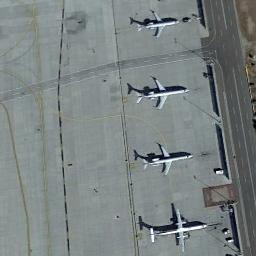

airplane



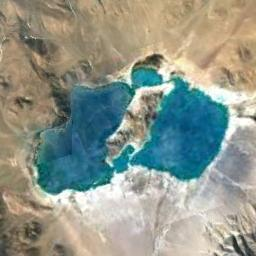

lake



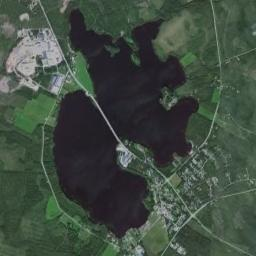

lake



In [21]:
for n in range(3):
    image_index = random.choice(range(len(all_image_path)))
    display.display(display.Image(all_image_path[image_index]))
    print(index_to_label[all_image_label[image_index]])
    print()

In [22]:
img_path = all_image_path[0]

In [23]:
img_raw = tf.io.read_file(img_path)

In [24]:
img_tensor = tf.image.decode_image(img_raw)

In [25]:
img_tensor.shape

TensorShape([256, 256, 3])

In [26]:
img_tensor.dtype

tf.uint8

In [27]:
img_tensor = tf.cast(img_tensor, tf.float32)
img_tensor = img_tensor / 255

In [28]:
def load_preprocess_image(path):
    img_raw = tf.io.read_file(path)
    img_tensor = tf.image.decode_jpeg(img_raw, channels=3)
    img_tensor = tf.image.resize(img_tensor, [256, 256])
    img_tensor = tf.cast(img_tensor, tf.float32)
    img = img_tensor / 255
    return img

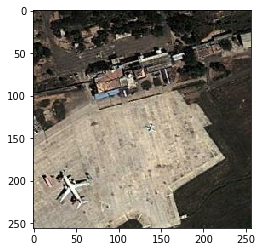

In [29]:
img1 = all_image_path[100]
plt.imshow(load_preprocess_image(img1))

In [30]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_path)

In [31]:
image_dataset = path_ds.map(load_preprocess_image)

In [32]:
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [33]:
label_dataset = tf.data.Dataset.from_tensor_slices(all_image_label)

In [34]:
for label in label_dataset.take(10):
    print(label.numpy()) 

1
0
1
0
0
0
1
0
0
1


In [35]:
dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

In [36]:
test_count = int(image_count * 0.2)
train_count = image_count - test_count

In [37]:
train_dataset = dataset.skip(test_count)

In [38]:
test_dataset = dataset.take(test_count)

In [39]:
BATCH_SIZE = 32

In [40]:
train_dataset = train_dataset.shuffle(buffer_size=train_count).batch(BATCH_SIZE).repeat()

In [41]:
test_dataset = test_dataset.batch(BATCH_SIZE)

In [57]:
model = tf.keras.Sequential()  # 顺序模型
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256, 256, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 254, 254, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 125, 125, 128)     73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 123, 123, 128)     147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 128)      

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [60]:
steps_per_epoch = train_count // BATCH_SIZE
validation_steps = test_count // BATCH_SIZE

In [61]:
history = model.fit(train_dataset, epochs=30,
         validation_data=test_dataset,
         steps_per_epoch=steps_per_epoch,
         validation_steps=validation_steps)

Epoch 1/30
35/35 [==============================] - 17s 480ms/step - loss: 1.0028 - acc: 0.5205 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/30
35/35 [==============================] - 15s 416ms/step - loss: 0.6880 - acc: 0.5688 - val_loss: 0.6438 - val_acc: 0.6953
Epoch 3/30
35/35 [==============================] - 15s 422ms/step - loss: 0.5283 - acc: 0.7607 - val_loss: 0.2514 - val_acc: 0.9102
Epoch 4/30
35/35 [==============================] - 15s 422ms/step - loss: 0.5888 - acc: 0.7357 - val_loss: 0.3650 - val_acc: 0.8828
Epoch 5/30
35/35 [==============================] - 15s 425ms/step - loss: 0.6479 - acc: 0.7929 - val_loss: 0.2516 - val_acc: 0.9102
Epoch 6/30
35/35 [==============================] - 15s 425ms/step - loss: 0.3330 - acc: 0.9259 - val_loss: 0.2180 - val_acc: 0.9297
Epoch 7/30
35/35 [==============================] - 15s 428ms/step - loss: 0.1614 - acc: 0.9563 - val_loss: 0.1495 - val_acc: 0.9688
Epoch 8/30
35/35 [==============================] - 15s 426ms/step - 

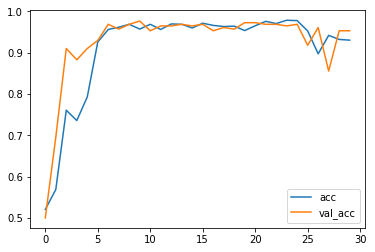

In [63]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

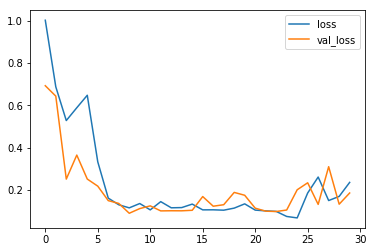

In [64]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()